## Libraries

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         pass

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install torch-summary
!pip install torch-lr-finder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from IPython.display import display
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary
from tqdm import tqdm
import torchvision.models as models
import PIL
from torchvision.models import resnet50, ResNet50_Weights
import timm

In [ ]:
torch.manual_seed(0)

## Import

In [ ]:
!file "/content/new plates.zip"

/content/new plates.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


In [ ]:
#unzip
!unzip "/content/new plates.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/MASSACHUSETTS/092.jpg  
  inflating: train/MASSACHUSETTS/093.jpg  
  inflating: train/MASSACHUSETTS/094.jpg  
  inflating: train/MASSACHUSETTS/095.jpg  
  inflating: train/MASSACHUSETTS/096.jpg  
  inflating: train/MASSACHUSETTS/097.jpg  
  inflating: train/MASSACHUSETTS/098.jpg  
  inflating: train/MASSACHUSETTS/099.jpg  
  inflating: train/MASSACHUSETTS/100.jpg  
  inflating: train/MASSACHUSETTS/101.jpg  
  inflating: train/MASSACHUSETTS/102.jpg  
  inflating: train/MASSACHUSETTS/103.jpg  
  inflating: train/MASSACHUSETTS/104.jpg  
  inflating: train/MASSACHUSETTS/105.jpg  
  inflating: train/MASSACHUSETTS/106.jpg  
  inflating: train/MASSACHUSETTS/107.jpg  
  inflating: train/MASSACHUSETTS/108.jpg  
  inflating: train/MASSACHUSETTS/109.jpg  
  inflating: train/MASSACHUSETTS/110.jpg  
  inflating: train/MASSACHUSETTS/111.jpg  
  inflating: train/MASSACHUSETTS/112.jpg  
  inflating: train/MASSACHUSETTS/113.jpg  
  i

In [ ]:
data_path = '/content/plates'

In [ ]:
class_name = os.listdir(data_path +'/train')
print(class_name)

['FLORIDA', 'MASSACHUSETTS', 'SOUTH CAROLINA', 'PENNSYLVANIA', 'UTAH', 'TEXAS', 'MICHIGAN', 'AMERICAN SAMOA', 'MARYLAND', 'CNMI', 'OREGON', 'NEW JERSEY', 'WASHINGTON', 'GEORGIA', 'MAINE', 'ALASKA', 'DELAWARE', 'LOUISIANA', 'IDAHO', 'KENTUCKY', 'VERMONT', 'NORTH CAROLINA', 'CALIFORNIA', 'ARIZONA', 'MONTANA', 'CONNECTICUT', 'HAWAI', 'MISSIPPI', 'NEW HAMPSHIRE', 'GUAM', 'KANSAS', 'PUERTO RICO', 'OHIO', 'WYOMING', 'RHODE ISLAND', 'IOWA', 'TENNESSEE', 'INDIANA', 'OKLAHOMA', 'WEST VIRGINIA', 'NORTH DAKOTA', 'MISSOURI', 'MINNESOTA', 'NEW MEXICO', 'U S VIRGIN ISLANDS', 'SOUTH DAKOTA', 'ALABAMA', 'COLORADO', 'WISCONSIN', 'WASHINGTON DC', 'ILLINOIS', 'NEBRASKA', 'NEW YORK', 'VIRGINIA', 'NEVADA', 'ARKANSAS']


In [ ]:
def get_count(set_type, state):
    return len(os.listdir(data_path + '/' + set_type + "/" + state))

In [ ]:
for each_class in class_name:
    for set_type in ['train', 'test']:
        print("Number of {} samples in {} category {}".format(set_type, each_class, get_count(set_type, each_class)))

Number of train samples in FLORIDA category 149
Number of test samples in FLORIDA category 5
Number of train samples in MASSACHUSETTS category 156
Number of test samples in MASSACHUSETTS category 5
Number of train samples in SOUTH CAROLINA category 140
Number of test samples in SOUTH CAROLINA category 5
Number of train samples in PENNSYLVANIA category 141
Number of test samples in PENNSYLVANIA category 5
Number of train samples in UTAH category 158
Number of test samples in UTAH category 5
Number of train samples in TEXAS category 155
Number of test samples in TEXAS category 5
Number of train samples in MICHIGAN category 148
Number of test samples in MICHIGAN category 5
Number of train samples in AMERICAN SAMOA category 143
Number of test samples in AMERICAN SAMOA category 5
Number of train samples in MARYLAND category 175
Number of test samples in MARYLAND category 5
Number of train samples in CNMI category 86
Number of test samples in CNMI category 5
Number of train samples in OREGON

<ipython-input-39-cbd70dce14d0>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


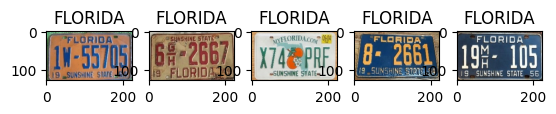

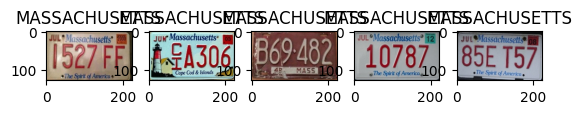

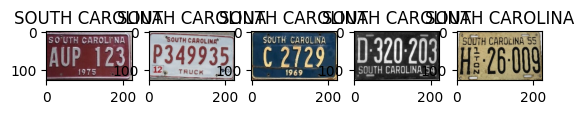

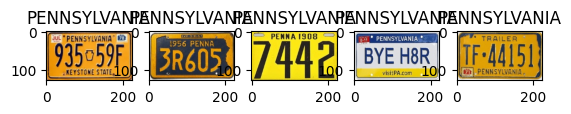

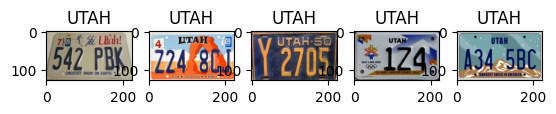

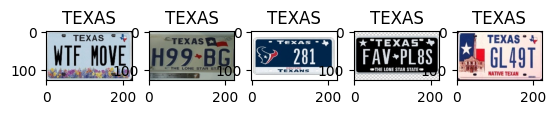

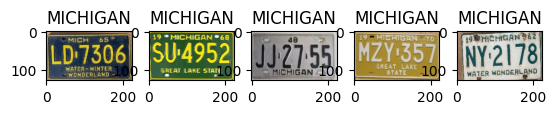

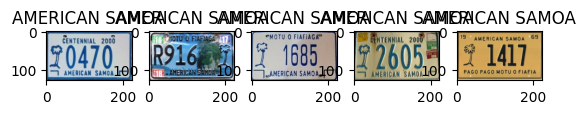

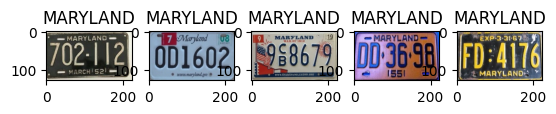

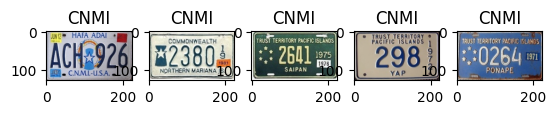

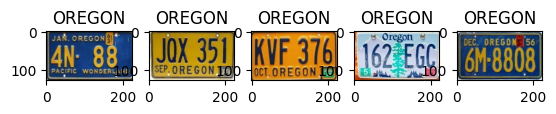

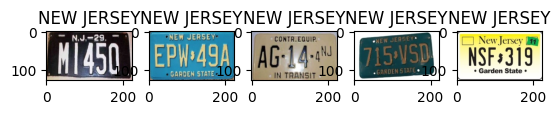

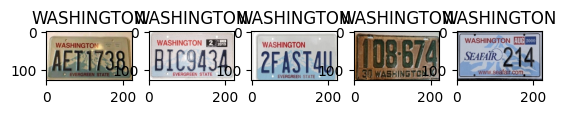

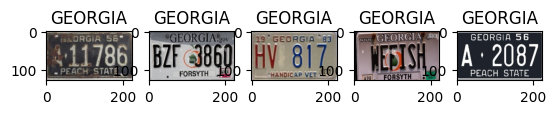

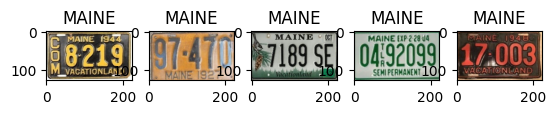

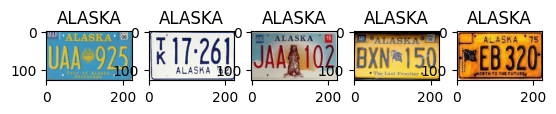

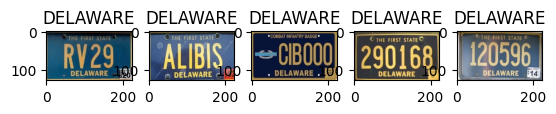

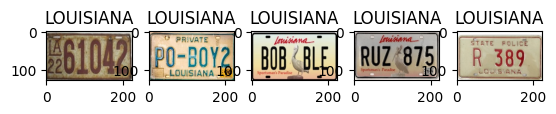

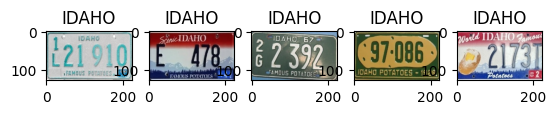

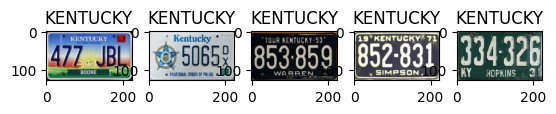

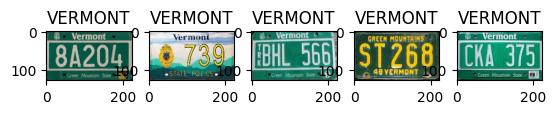

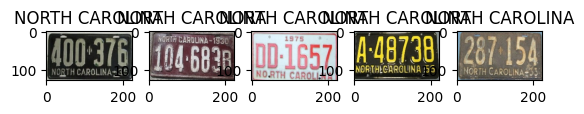

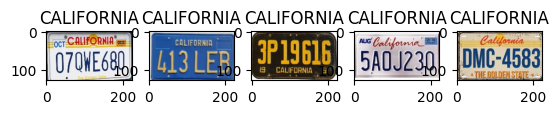

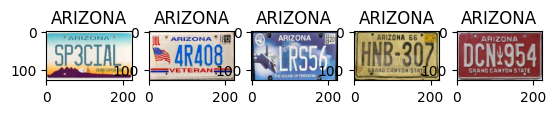

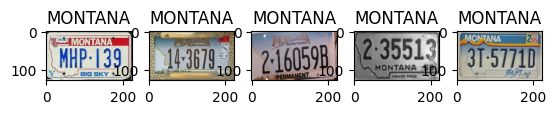

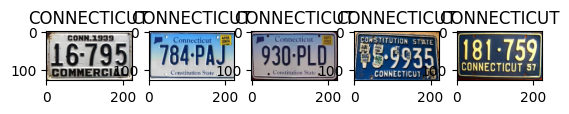

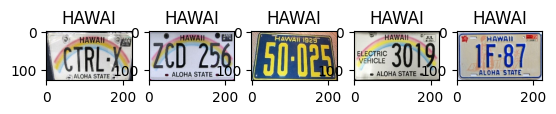

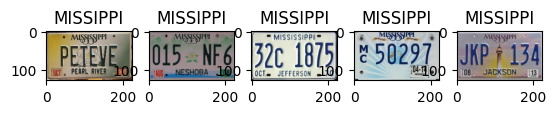

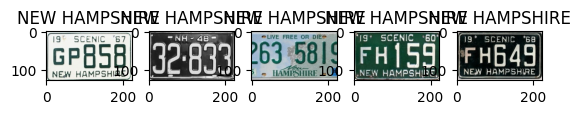

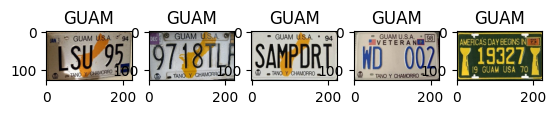

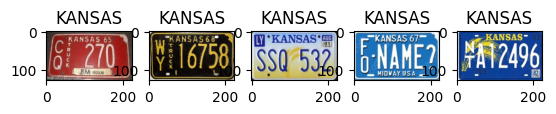

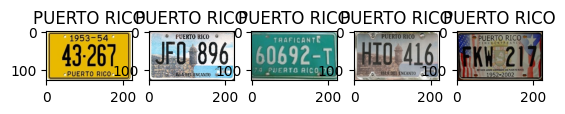

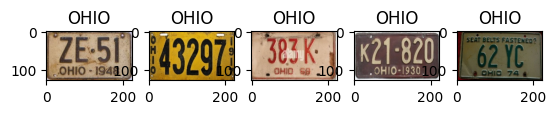

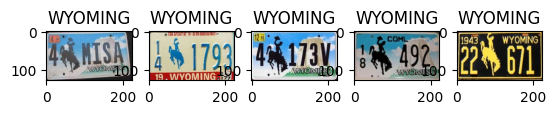

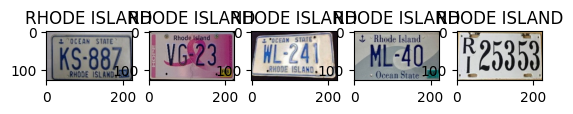

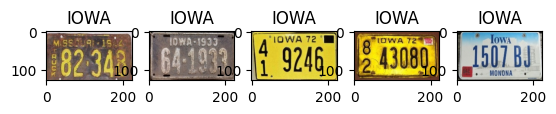

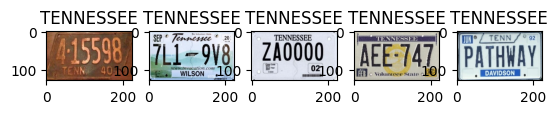

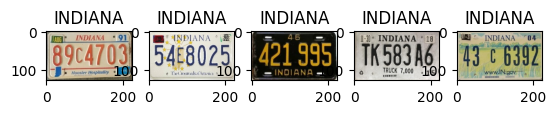

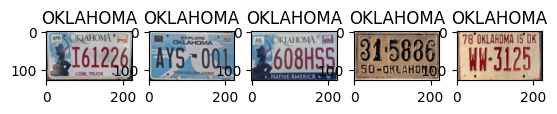

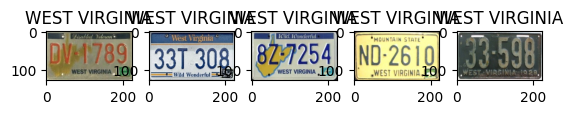

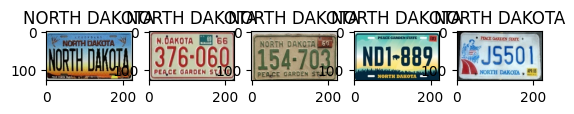

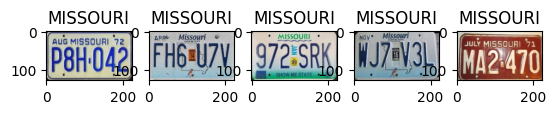

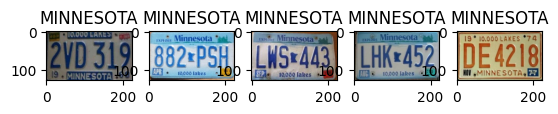

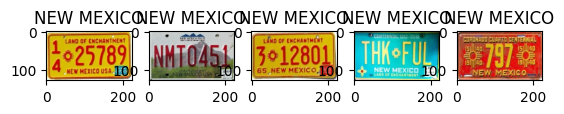

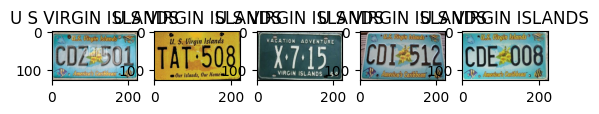

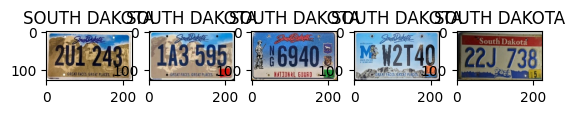

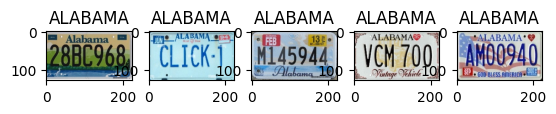

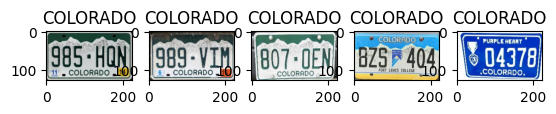

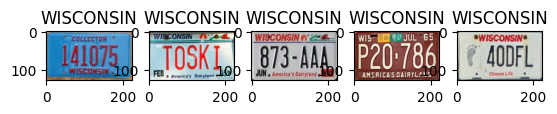

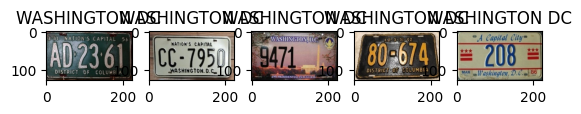

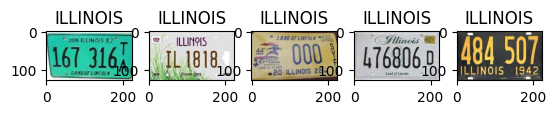

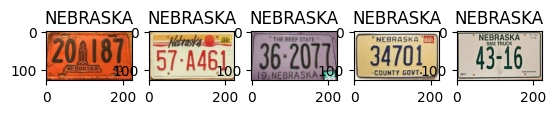

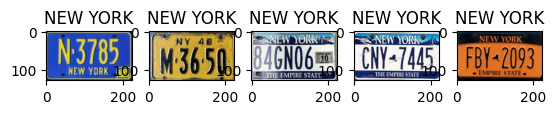

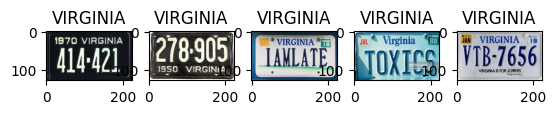

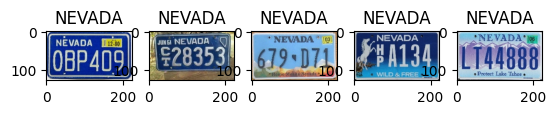

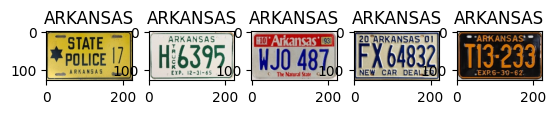

In [ ]:
directory=os.listdir(data_path + '/train')
for each in directory:
    plt.figure()
    currentFolder = data_path + '/train/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = data_path + '/train/' + each + "/" + file
        #print(fullpath)
        #print(plt.imread(fullpath).shape)
        img=mpimg.imread(fullpath)
        ax=plt.subplot(1,5,i+1)
        ax.set_title(each)
        plt.imshow(img)

## Transform & Train

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.GaussianBlur(5, sigma=0.60),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225]), transforms.RandomErasing()])
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])])
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform= train_transform)
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform= test_transform)
train_loader = DataLoader(train_data,
                          batch_size= 32, shuffle= True, pin_memory= True)
test_loader = DataLoader(test_data,
                         batch_size= 32, shuffle= False, pin_memory= True)
#class_names = train_data.classes
print(class_name)
print(f'Number of train images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

['FLORIDA', 'MASSACHUSETTS', 'SOUTH CAROLINA', 'PENNSYLVANIA', 'UTAH', 'TEXAS', 'MICHIGAN', 'AMERICAN SAMOA', 'MARYLAND', 'CNMI', 'OREGON', 'NEW JERSEY', 'WASHINGTON', 'GEORGIA', 'MAINE', 'ALASKA', 'DELAWARE', 'LOUISIANA', 'IDAHO', 'KENTUCKY', 'VERMONT', 'NORTH CAROLINA', 'CALIFORNIA', 'ARIZONA', 'MONTANA', 'CONNECTICUT', 'HAWAI', 'MISSIPPI', 'NEW HAMPSHIRE', 'GUAM', 'KANSAS', 'PUERTO RICO', 'OHIO', 'WYOMING', 'RHODE ISLAND', 'IOWA', 'TENNESSEE', 'INDIANA', 'OKLAHOMA', 'WEST VIRGINIA', 'NORTH DAKOTA', 'MISSOURI', 'MINNESOTA', 'NEW MEXICO', 'U S VIRGIN ISLANDS', 'SOUTH DAKOTA', 'ALABAMA', 'COLORADO', 'WISCONSIN', 'WASHINGTON DC', 'ILLINOIS', 'NEBRASKA', 'NEW YORK', 'VIRGINIA', 'NEVADA', 'ARKANSAS']
Number of train images: 8161
Number of test images: 280


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available processor {}".format(device))
model = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#MODEL_NAME = 'resnext50d_32x4d'
#model = timm.models.create_model(MODEL_NAME, pretrained=True)
summary(model, input_size=(3, 224, 224))

Available processor cuda


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 191MB/s]


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  4,096
|    |    └─BatchNorm2d: 3-2             128
|    |    └─Conv2d: 3-3                  36,864
|    |    └─BatchNorm2d: 3-4             128
|    |    └─Conv2d: 3-5                  16,384
|    |    └─BatchNorm2d: 3-6             512
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              16,896
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  16,384
|    |    └─BatchNorm2d: 3-10            128
|    |    └─Conv2d: 3-11                 36,864
|    |    └─BatchNorm2d: 3-12            128
|    |    └─Conv2d: 3-13                 16,384
|    |    └─BatchNorm2d: 3-14      

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  4,096
|    |    └─BatchNorm2d: 3-2             128
|    |    └─Conv2d: 3-3                  36,864
|    |    └─BatchNorm2d: 3-4             128
|    |    └─Conv2d: 3-5                  16,384
|    |    └─BatchNorm2d: 3-6             512
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              16,896
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  16,384
|    |    └─BatchNorm2d: 3-10            128
|    |    └─Conv2d: 3-11                 36,864
|    |    └─BatchNorm2d: 3-12            128
|    |    └─Conv2d: 3-13                 16,384
|    |    └─BatchNorm2d: 3-14      

In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm

# Initialize lists to store losses and accuracy
train_losses = []
test_losses = []
train_acc = []
test_acc = []

lambda1 = 0.005  # L1 Regularization (currently not used)
criterion = nn.CrossEntropyLoss()  # Loss function

def train(model, device, train_loader, optimizer, epoch):
    """ Train the model for one epoch """
    model.train()
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}")  # Progress bar

    correct = 0
    processed = 0
    running_loss = 0  # Track loss per epoch

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        y_pred = model(data)
        loss = criterion(y_pred, target)

        # Optional: Add L1 Regularization (if needed)
        # l1 = sum(p.abs().sum() for p in model.parameters())
        # loss += lambda1 * l1

        loss.backward()
        optimizer.step()

        # Convert loss to float before appending
        running_loss += loss.item()

        # Calculate batch accuracy
        pred = y_pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)

        # Update progress bar
        pbar.set_description(f'Loss={loss.item():.4f} | Batch={batch_idx} | Accuracy={100*correct/processed:.2f}%')

    # Append per-epoch loss and accuracy
    train_losses.append(running_loss / len(train_loader))  # Average loss per batch
    train_acc.append(100 * correct / processed)  # Accuracy per epoch

def test(model, device, test_loader):
    """ Evaluate the model on the test set """
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # Accumulate loss
            test_loss += criterion(output, target).item()  # Convert tensor to float

            # Get predicted class
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Compute average loss
    test_loss /= len(test_loader)

    # Append per-epoch loss and accuracy
    test_losses.append(test_loss)
    accuracy = 100. * correct / len(test_loader.dataset)
    test_acc.append(accuracy)

    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')

    return accuracy  # Return accuracy as a float

In [ ]:
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for name, param in model.named_parameters():
            param.requires_grad = False

set_parameter_requires_grad(model)

In [ ]:
#print(model)

In [ ]:
model.fc = nn.Sequential(
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, len(class_name)),
        )

In [ ]:
# enabling layer4 for learning parameters
for name, param in model.named_parameters():
    if 'layer4' in name:
        print(name)
        param.requires_grad = True

layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.weight
layer4.0.bn2.weight
layer4.0.bn2.bias
layer4.0.conv3.weight
layer4.0.bn3.weight
layer4.0.bn3.bias
layer4.0.downsample.0.weight
layer4.0.downsample.1.weight
layer4.0.downsample.1.bias
layer4.1.conv1.weight
layer4.1.bn1.weight
layer4.1.bn1.bias
layer4.1.conv2.weight
layer4.1.bn2.weight
layer4.1.bn2.bias
layer4.1.conv3.weight
layer4.1.bn3.weight
layer4.1.bn3.bias
layer4.2.conv1.weight
layer4.2.bn1.weight
layer4.2.bn1.bias
layer4.2.conv2.weight
layer4.2.bn2.weight
layer4.2.bn2.bias
layer4.2.conv3.weight
layer4.2.bn3.weight
layer4.2.bn3.bias


In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.weight
layer4.0.bn2.weight
layer4.0.bn2.bias
layer4.0.conv3.weight
layer4.0.bn3.weight
layer4.0.bn3.bias
layer4.0.downsample.0.weight
layer4.0.downsample.1.weight
layer4.0.downsample.1.bias
layer4.1.conv1.weight
layer4.1.bn1.weight
layer4.1.bn1.bias
layer4.1.conv2.weight
layer4.1.bn2.weight
layer4.1.bn2.bias
layer4.1.conv3.weight
layer4.1.bn3.weight
layer4.1.bn3.bias
layer4.2.conv1.weight
layer4.2.bn1.weight
layer4.2.bn1.bias
layer4.2.conv2.weight
layer4.2.bn2.weight
layer4.2.bn2.bias
layer4.2.conv3.weight
layer4.2.bn3.weight
layer4.2.bn3.bias
fc.0.weight
fc.0.bias
fc.2.weight
fc.2.bias
fc.4.weight
fc.4.bias
fc.6.weight
fc.6.bias


In [ ]:
params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

	 layer4.0.conv1.weight
	 layer4.0.bn1.weight
	 layer4.0.bn1.bias
	 layer4.0.conv2.weight
	 layer4.0.bn2.weight
	 layer4.0.bn2.bias
	 layer4.0.conv3.weight
	 layer4.0.bn3.weight
	 layer4.0.bn3.bias
	 layer4.0.downsample.0.weight
	 layer4.0.downsample.1.weight
	 layer4.0.downsample.1.bias
	 layer4.1.conv1.weight
	 layer4.1.bn1.weight
	 layer4.1.bn1.bias
	 layer4.1.conv2.weight
	 layer4.1.bn2.weight
	 layer4.1.bn2.bias
	 layer4.1.conv3.weight
	 layer4.1.bn3.weight
	 layer4.1.bn3.bias
	 layer4.2.conv1.weight
	 layer4.2.bn1.weight
	 layer4.2.bn1.bias
	 layer4.2.conv2.weight
	 layer4.2.bn2.weight
	 layer4.2.bn2.bias
	 layer4.2.conv3.weight
	 layer4.2.bn3.weight
	 layer4.2.bn3.bias
	 fc.0.weight
	 fc.0.bias
	 fc.2.weight
	 fc.2.bias
	 fc.4.weight
	 fc.4.bias
	 fc.6.weight
	 fc.6.bias


In [ ]:
model =  model.to(device)

In [ ]:
print(model.fc)
print(len(class_name))

Sequential(
  (0): Linear(in_features=2048, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=256, bias=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=56, bias=True)
)
56


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.87E+01


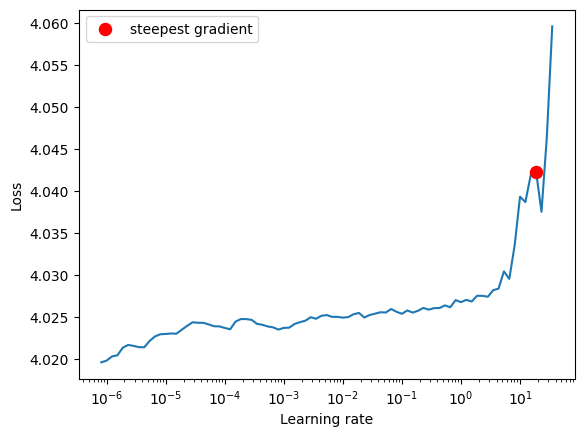

In [ ]:
from torch_lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params_to_update, lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
import torch
import os
model =  model.to(device)
# lrr=0.01

optimizer = torch.optim.SGD(params_to_update, lr=0.1, momentum=0.9)#, weight_decay=1e-2)

scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,15], gamma=0.1)


# Create checkpoint directory
checkpoint_path = "model_checkpoints/"
os.makedirs(checkpoint_path, exist_ok=True)

best_acc = 0.0  # Track best accuracy
EPOCHS = 25

for epoch in range(EPOCHS):
    print(f"EPOCH: {epoch + 1}/{EPOCHS}")

    # Train the model
    train(model, device, train_loader, optimizer, epoch)

    # Step the scheduler
    scheduler.step()

    # # Evaluate on test set
    # test_acc = test(model, device, test_loader)

    # Evaluate on test set (FIX HERE)
    current_test_acc = test(model, device, test_loader)  # Changed variable name

    # Save checkpoint every epoch
    checkpoint = {
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "test_accuracy": current_test_acc  # Update here
    }
    torch.save(checkpoint, f"{checkpoint_path}/checkpoint_epoch_{epoch+1}.pth")
    print(f"Checkpoint saved: checkpoint_epoch_{epoch+1}.pth")

    # Save the best model based on accuracy (FIX HERE)
    if current_test_acc > best_acc:  # Update here
        best_acc = current_test_acc  # Update here
        torch.save(model.state_dict(), f"{checkpoint_path}/best_model.pth")
        print(f"🎯 Best model updated! Test Accuracy: {best_acc:.4f}")

    # Print current learning rate
    print(f"Current Learning Rate: {optimizer.state_dict()['param_groups'][0]['lr']}\n")

EPOCH: 1/25


Loss=3.8018 | Batch=255 | Accuracy=90.00%: 100%|██████████| 256/256 [01:25<00:00,  3.00it/s]



Test set: Average loss: 0.6921, Accuracy: 241/280 (86.07%)

Checkpoint saved: checkpoint_epoch_1.pth
🎯 Best model updated! Test Accuracy: 86.0714
Current Learning Rate: 0.1

EPOCH: 2/25


Loss=2.2922 | Batch=255 | Accuracy=91.32%: 100%|██████████| 256/256 [01:23<00:00,  3.05it/s]



Test set: Average loss: 0.7183, Accuracy: 241/280 (86.07%)

Checkpoint saved: checkpoint_epoch_2.pth
Current Learning Rate: 0.1

EPOCH: 3/25


Loss=0.0315 | Batch=255 | Accuracy=90.83%: 100%|██████████| 256/256 [01:25<00:00,  2.99it/s]



Test set: Average loss: 0.8362, Accuracy: 234/280 (83.57%)

Checkpoint saved: checkpoint_epoch_3.pth
Current Learning Rate: 0.1

EPOCH: 4/25


Loss=6.1868 | Batch=255 | Accuracy=91.78%: 100%|██████████| 256/256 [01:25<00:00,  3.00it/s]



Test set: Average loss: 0.8195, Accuracy: 241/280 (86.07%)

Checkpoint saved: checkpoint_epoch_4.pth
Current Learning Rate: 0.1

EPOCH: 5/25


Loss=3.4822 | Batch=255 | Accuracy=93.06%: 100%|██████████| 256/256 [01:24<00:00,  3.03it/s]



Test set: Average loss: 0.8141, Accuracy: 234/280 (83.57%)

Checkpoint saved: checkpoint_epoch_5.pth
Current Learning Rate: 0.1

EPOCH: 6/25


Loss=0.8746 | Batch=255 | Accuracy=93.08%: 100%|██████████| 256/256 [01:23<00:00,  3.07it/s]



Test set: Average loss: 0.8874, Accuracy: 231/280 (82.50%)

Checkpoint saved: checkpoint_epoch_6.pth
Current Learning Rate: 0.1

EPOCH: 7/25


Loss=2.6168 | Batch=255 | Accuracy=92.48%: 100%|██████████| 256/256 [01:23<00:00,  3.06it/s]



Test set: Average loss: 0.6615, Accuracy: 247/280 (88.21%)

Checkpoint saved: checkpoint_epoch_7.pth
🎯 Best model updated! Test Accuracy: 88.2143
Current Learning Rate: 0.1

EPOCH: 8/25


Loss=1.9095 | Batch=255 | Accuracy=92.64%: 100%|██████████| 256/256 [01:22<00:00,  3.10it/s]



Test set: Average loss: 0.9557, Accuracy: 232/280 (82.86%)

Checkpoint saved: checkpoint_epoch_8.pth
Current Learning Rate: 0.1

EPOCH: 9/25


Loss=4.6425 | Batch=255 | Accuracy=92.46%: 100%|██████████| 256/256 [01:22<00:00,  3.09it/s]



Test set: Average loss: 0.7172, Accuracy: 235/280 (83.93%)

Checkpoint saved: checkpoint_epoch_9.pth
Current Learning Rate: 0.1

EPOCH: 10/25


Loss=4.0823 | Batch=255 | Accuracy=93.16%: 100%|██████████| 256/256 [01:24<00:00,  3.04it/s]



Test set: Average loss: 0.7666, Accuracy: 242/280 (86.43%)

Checkpoint saved: checkpoint_epoch_10.pth
Current Learning Rate: 0.010000000000000002

EPOCH: 11/25


Loss=4.9438 | Batch=255 | Accuracy=96.10%: 100%|██████████| 256/256 [01:22<00:00,  3.09it/s]



Test set: Average loss: 0.5777, Accuracy: 251/280 (89.64%)

Checkpoint saved: checkpoint_epoch_11.pth
🎯 Best model updated! Test Accuracy: 89.6429
Current Learning Rate: 0.010000000000000002

EPOCH: 12/25


Loss=3.5074 | Batch=255 | Accuracy=97.24%: 100%|██████████| 256/256 [01:24<00:00,  3.04it/s]



Test set: Average loss: 0.5775, Accuracy: 252/280 (90.00%)

Checkpoint saved: checkpoint_epoch_12.pth
🎯 Best model updated! Test Accuracy: 90.0000
Current Learning Rate: 0.010000000000000002

EPOCH: 13/25


Loss=0.1309 | Batch=255 | Accuracy=97.43%: 100%|██████████| 256/256 [01:23<00:00,  3.07it/s]



Test set: Average loss: 0.4949, Accuracy: 255/280 (91.07%)

Checkpoint saved: checkpoint_epoch_13.pth
🎯 Best model updated! Test Accuracy: 91.0714
Current Learning Rate: 0.010000000000000002

EPOCH: 14/25


Loss=4.3351 | Batch=255 | Accuracy=97.48%: 100%|██████████| 256/256 [01:22<00:00,  3.09it/s]



Test set: Average loss: 0.5699, Accuracy: 255/280 (91.07%)

Checkpoint saved: checkpoint_epoch_14.pth
Current Learning Rate: 0.010000000000000002

EPOCH: 15/25


Loss=5.6359 | Batch=255 | Accuracy=97.95%: 100%|██████████| 256/256 [01:24<00:00,  3.02it/s]



Test set: Average loss: 0.4837, Accuracy: 255/280 (91.07%)

Checkpoint saved: checkpoint_epoch_15.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 16/25


Loss=1.5818 | Batch=255 | Accuracy=98.00%: 100%|██████████| 256/256 [01:23<00:00,  3.07it/s]



Test set: Average loss: 0.5194, Accuracy: 250/280 (89.29%)

Checkpoint saved: checkpoint_epoch_16.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 17/25


Loss=4.4150 | Batch=255 | Accuracy=97.95%: 100%|██████████| 256/256 [01:23<00:00,  3.06it/s]



Test set: Average loss: 0.5163, Accuracy: 253/280 (90.36%)

Checkpoint saved: checkpoint_epoch_17.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 18/25


Loss=3.5290 | Batch=255 | Accuracy=98.14%: 100%|██████████| 256/256 [01:22<00:00,  3.10it/s]



Test set: Average loss: 0.5435, Accuracy: 255/280 (91.07%)

Checkpoint saved: checkpoint_epoch_18.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 19/25


Loss=0.9083 | Batch=255 | Accuracy=98.21%: 100%|██████████| 256/256 [01:22<00:00,  3.09it/s]



Test set: Average loss: 0.5011, Accuracy: 255/280 (91.07%)

Checkpoint saved: checkpoint_epoch_19.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 20/25


Loss=0.0057 | Batch=255 | Accuracy=98.04%: 100%|██████████| 256/256 [01:23<00:00,  3.05it/s]



Test set: Average loss: 0.5227, Accuracy: 253/280 (90.36%)

Checkpoint saved: checkpoint_epoch_20.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 21/25


Loss=2.2359 | Batch=255 | Accuracy=98.04%: 100%|██████████| 256/256 [01:24<00:00,  3.05it/s]



Test set: Average loss: 0.5554, Accuracy: 251/280 (89.64%)

Checkpoint saved: checkpoint_epoch_21.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 22/25


Loss=3.3167 | Batch=255 | Accuracy=98.22%: 100%|██████████| 256/256 [01:24<00:00,  3.04it/s]



Test set: Average loss: 0.5041, Accuracy: 254/280 (90.71%)

Checkpoint saved: checkpoint_epoch_22.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 23/25


Loss=0.7316 | Batch=255 | Accuracy=98.30%: 100%|██████████| 256/256 [01:24<00:00,  3.03it/s]



Test set: Average loss: 0.5407, Accuracy: 256/280 (91.43%)

Checkpoint saved: checkpoint_epoch_23.pth
🎯 Best model updated! Test Accuracy: 91.4286
Current Learning Rate: 0.0010000000000000002

EPOCH: 24/25


Loss=0.0301 | Batch=255 | Accuracy=98.28%: 100%|██████████| 256/256 [01:25<00:00,  3.01it/s]



Test set: Average loss: 0.4882, Accuracy: 256/280 (91.43%)

Checkpoint saved: checkpoint_epoch_24.pth
Current Learning Rate: 0.0010000000000000002

EPOCH: 25/25


Loss=3.5181 | Batch=255 | Accuracy=98.24%: 100%|██████████| 256/256 [01:24<00:00,  3.04it/s]



Test set: Average loss: 0.4875, Accuracy: 255/280 (91.07%)

Checkpoint saved: checkpoint_epoch_25.pth
Current Learning Rate: 0.0010000000000000002



In [ ]:
print("\n🔥 Best Model Performance:")

print(f"  Test Accuracy: {best_acc:.2f}%")


🔥 Best Model Performance:
  Test Accuracy: 91.43%


## Import of Cheng

In [ ]:
%pip install "numpy<2" matplotlib torch==2.2.2 torchaudio==2.2.2 torchvision==0.17.2 torchmetrics scikit-image kornia

  Using cached torchmetrics-1.6.3-py3-none-any.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB

In [ ]:
!pip install compressai

  Using cached compressai-1.2.6.tar.gz (163 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00
  Created wheel for compressai: filename=compressai-1.2.6-cp311-cp311-linux_x86_64.whl size=408074 sha256=05165d449baab892e9f62b3c50fc4f6a59aa55ab93041f2f885f96a401003010
  Stored in directory: /root/.cache/pip/wheels/1f/d3/78/5b508876d71c232f7bf238741c54e4c207d169617e14148f23
Successfully built compressai


In [ ]:
import torch
from kornia.losses import PSNRLoss, SSIMLoss
from torchmetrics.image import VisualInformationFidelity
import torch.nn.functional as F
from compressai.zoo import models
from torchvision import transforms
import PIL
import numpy as np
from skimage import io , img_as_float

In [ ]:
from compressai.zoo import models
model_names = []
for model_name in models:
    model_names.append(model_name)
print(model_names)

['bmshj2018-factorized', 'bmshj2018-factorized-relu', 'bmshj2018-hyperprior', 'mbt2018-mean', 'mbt2018', 'cheng2020-anchor', 'cheng2020-attn', 'bmshj2018-hyperprior-vbr', 'mbt2018-mean-vbr', 'mbt2018-vbr', 'hrtzxf2022-pcc-rec', 'sfu2023-pcc-rec-pointnet', 'sfu2024-pcc-rec-pointnet2-ssg', 'ssf2020']


In [ ]:
max_values_of_quality = [0] * len(models)

for i, model_name in enumerate(models):
    model_class = models[model_name]
    print(f"Testing {model_name}")

    j = 1
    max_quality = None

    while max_quality is None:
        try:
            print(f"Trying quality={j}")
            model = model_class(quality=j, pretrained=True)
            j += 1
        except ValueError as e:
            # We've found the limit when ValueError is raised
            max_quality = j - 1
            print(f"Max quality for {model_name}: {max_quality}")
        except TypeError as e:
            # This model might not use quality parameter
            print(f"Model {model_name} may not use quality parameter: {e}")
            max_quality = "N/A"
        except Exception as e:
            # Handle other unexpected errors
            print(f"Error with {model_name}: {e}")
            max_quality = "Error"
        if j>20:
            break

    max_values_of_quality[i] = max_quality

Testing bmshj2018-factorized
Trying quality=1
Trying quality=2
Trying quality=3
Trying quality=4
Trying quality=5
Trying quality=6
Trying quality=7
Trying quality=8
Trying quality=9
Max quality for bmshj2018-factorized: 8
Testing bmshj2018-factorized-relu
Trying quality=1
Trying quality=2
Trying quality=3
Trying quality=4
Trying quality=5
Trying quality=6
Trying quality=7
Trying quality=8
Trying quality=9
Max quality for bmshj2018-factorized-relu: 8
Testing bmshj2018-hyperprior
Trying quality=1
Trying quality=2
Trying quality=3
Trying quality=4
Trying quality=5
Trying quality=6
Trying quality=7
Trying quality=8
Trying quality=9
Max quality for bmshj2018-hyperprior: 8
Testing mbt2018-mean
Trying quality=1
Trying quality=2
Trying quality=3
Trying quality=4
Trying quality=5
Trying quality=6
Trying quality=7
Trying quality=8
Trying quality=9
Max quality for mbt2018-mean: 8
Testing mbt2018
Trying quality=1
Trying quality=2
Trying quality=3
Trying quality=4
Trying quality=5
Trying quality=6


Downloading: "https://compressai.s3.amazonaws.com/models/v1/mbt2018-mse-vbr-53f56fca.pth.tar" to /root/.cache/torch/hub/checkpoints/mbt2018-mse-vbr-53f56fca.pth.tar


Error with mbt2018-vbr: HTTP Error 403: Forbidden
Testing hrtzxf2022-pcc-rec
Trying quality=1
Model hrtzxf2022-pcc-rec may not use quality parameter: 'NoneType' object is not callable
Testing sfu2023-pcc-rec-pointnet
Trying quality=1
Model sfu2023-pcc-rec-pointnet may not use quality parameter: 'NoneType' object is not callable
Testing sfu2024-pcc-rec-pointnet2-ssg
Trying quality=1
Model sfu2024-pcc-rec-pointnet2-ssg may not use quality parameter: 'NoneType' object is not callable
Testing ssf2020
Trying quality=1
Trying quality=2
Trying quality=3
Trying quality=4
Trying quality=5
Trying quality=6
Trying quality=7
Trying quality=8
Trying quality=9
Trying quality=10
Max quality for ssf2020: 9


In [ ]:
print(max_values_of_quality)
model_names = [x for x in models]
accepted_model =[]
for i in range(14):
    # print(max_values_of_quality[i],model_names[i])
    if type(max_values_of_quality[i]) == int:
        accepted_model.append([model_names[i],max_values_of_quality[i]])
print(accepted_model)

[8, 8, 8, 8, 8, 6, 6, None, None, 'Error', 'N/A', 'N/A', 'N/A', 9]
[['bmshj2018-factorized', 8], ['bmshj2018-factorized-relu', 8], ['bmshj2018-hyperprior', 8], ['mbt2018-mean', 8], ['mbt2018', 8], ['cheng2020-anchor', 6], ['cheng2020-attn', 6], ['ssf2020', 9]]


In [ ]:
vif = VisualInformationFidelity()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # setting the computation on GPU or CPU
vif.to(device)

# x and y are torch images, maximum_value is 1 or 255
# bring the image into GPU or CPU
# x = x.to(device)
# y = y.to(device)

def PSNR(x,y,max_val):
    psnr = PSNRLoss(max_val=max_val)
    return -psnr(x,y).item()
def SSIM(x,y):
    ssim_loss = SSIMLoss(window_size=11, reduction='mean')
    ssim_value = 1-ssim_loss(x,y).item()
    return ssim_value

def BPP(image_tensor,model, num_pixels):
    output = model(image_tensor)
    # Calculate BPP
    bpp = sum(
        torch.log(likelihoods).sum() / (-torch.log(2) * num_pixels)
        for likelihoods in output["likelihoods"].values()
    )
    return bpp.item()

def VIF(x,y):
    return vif(x,y).item()

def mse(x,y):
    return F.mse_loss(x,y).item()
def mae(x,y):
    return F.l1_loss(x,y).item()
def calculate_metrics(x,y,max_val,model,num_pixels):
    num_pixels = x.shape[2]*x.shape[3]
    output = model(x)
    bpp = sum(
        torch.log(likelihoods).sum() / (-torch.log(torch.tensor(2)) * num_pixels)
        for likelihoods in output["likelihoods"].values()
    )
    bpp = bpp.item()
    return {"psnr":PSNR(x,y,max_val),
            "ssim":SSIM(x,y),
            "vif":VIF(x,y),
            "mse":mse(x,y),
            "mae":mae(x,y),
            "bpp":bpp}
def compression_image_tensor(x,model,device,quality):
    x = x.to(device)
    with torch.no_grad():
        compressed = model(x)
        decompressed = compressed["x_hat"]
    return decompressed.detach()


## Somehow compress test image (cheng quality 1) -> test_compressed

Cheng2020 Requirement: Input dimensions (height × width) must be multiples of 128.

Your Dataset: 128×224 (height=128 ✔️, width=224 ❌ → 224 ÷ 128 = 1.75)

Kodak Dataset: Likely already uses dimensions like 512×768 (both divisible by 128) → no padding needed.

In [ ]:
import torch
from compressai.zoo import models
from torchvision import transforms
import torchvision.transforms.functional as F
import PIL
import numpy as np
from skimage import io , img_as_float
import pathlib

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # setting the computation on GPU or CPU
print("Device: ", device)

Device:  cuda


In [ ]:
# Original: './image_compression/ISIC-skin-cancer/Test'
data_path = '/content/plates'  # From your existing code
set_type = 'test'  # or 'train' depending on your need

for state in class_name:  # class_name contains your state names
    plates_path = []
    image_dir = os.path.join(data_path, set_type, state)



In [ ]:

from compressai.zoo import models
model_names = []
for model_name in models:
    model_names.append(model_name)
print(model_names)

# Constants
DATA_PATH = "/content/plates"  # Update with your path
SET_TYPE = "test"  # Force test set processing
COMPRESSED_ROOT = os.path.join(DATA_PATH, "test_compressed")  # Fixed output directory

# 1. Padding Function --------------------------------------------------------
def pad_to_multiple(img, mul=128):  # Changed to 128 for model compatibility
    """Pad images to multiples of 128 for model compatibility"""
    w, h = img.size
    pad_width = (mul - w % mul) % mul
    pad_height = (mul - h % mul) % mul

    img_tensor = transforms.ToTensor()(img)
    padded_img = F.pad(img_tensor, (0, pad_width, 0, pad_height), value=0)
    return transforms.ToPILImage()(padded_img)

# 2. Unified Preprocessing ---------------------------------------------------
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = pad_to_multiple(img)  # Apply padding first
    return transforms.ToTensor()(img).unsqueeze(0)

# 3. Compression Pipeline ----------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Clean previous outputs
if os.path.exists(COMPRESSED_ROOT):
    for root, dirs, files in os.walk(COMPRESSED_ROOT, topdown=False):
        for name in files:
            os.remove(os.path.join(root, name))
        for name in dirs:
            os.rmdir(os.path.join(root, name))

# Process all test images
for state in os.listdir(os.path.join(DATA_PATH, SET_TYPE)):
    state_dir = os.path.join(DATA_PATH, SET_TYPE, state)
    plate_paths = [
        os.path.join(state_dir, f)
        for f in os.listdir(state_dir)
        if f.endswith((".jpg", ".png"))
    ]

    plate_tensors = [preprocess_image(p).to(device) for p in plate_paths]

    for model_name, quality in [("cheng2020-anchor", 1), ("cheng2020-attn", 1)]:
        model = models[model_name](quality=quality, pretrained=True).to(device)
        model.eval()

        # Create unified output directory
        model_state_dir = os.path.join(
            COMPRESSED_ROOT,
            f"{model_name}-q{quality}",
            state
        )
        os.makedirs(model_state_dir, exist_ok=True)

        for idx, tensor in enumerate(plate_tensors):
            with torch.no_grad():
                compressed = model(tensor)
                decompressed = compressed["x_hat"].clamp(0, 1)

                # Convert and save
                decompressed_np = (decompressed.squeeze().cpu().permute(1, 2, 0).numpy() * 255).astype(np.uint8)
                Image.fromarray(decompressed_np).save(
                    os.path.join(model_state_dir,
                    f"{os.path.splitext(os.path.basename(plate_paths[idx]))[0]}.jpg")
                )

        del model
        torch.cuda.empty_cache()

['bmshj2018-factorized', 'bmshj2018-factorized-relu', 'bmshj2018-hyperprior', 'mbt2018-mean', 'mbt2018', 'cheng2020-anchor', 'cheng2020-attn', 'bmshj2018-hyperprior-vbr', 'mbt2018-mean-vbr', 'mbt2018-vbr', 'hrtzxf2022-pcc-rec', 'sfu2023-pcc-rec-pointnet', 'sfu2024-pcc-rec-pointnet2-ssg', 'ssf2020']


## Test accuracy on Q1

In [ ]:
# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint_path = "/content/model_checkpoints/best_model.pth"
data_path = "/content/plates"
batch_size = 32
class_names = os.listdir(os.path.join(data_path, "train"))  # Get original class order


In [ ]:

from torchvision import models as torch_models

# 1. Load Trained Model
def load_model(checkpoint_path, num_classes):
    model = torch_models.resnet50(weights=None)
    model.fc = nn.Sequential(
        nn.Linear(2048, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, num_classes)
    )

    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint)
    return model.to(device)

model = load_model(checkpoint_path, len(class_names))
model.eval()

# 2. Test Transformations (same as original)
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 3. Evaluation Function
def test_compressed(model, compressed_dir, device):
    test_data = datasets.ImageFolder(
        os.path.join(data_path, "test_compressed", compressed_dir),
        transform=test_transform
    )
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"{compressed_dir} - Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)")
    return accuracy



In [ ]:
# 4. Run Evaluations
print("Evaluating on compressed datasets:")
anchor_acc = test_compressed(model, "cheng2020-anchor-q1", device)
attn_acc = test_compressed(model, "cheng2020-attn-q1", device)

print("\nFinal Results:")
print(f"Original Test Accuracy: 91%")  # From your initial results
print(f"Anchor Compressed Accuracy Q1: {anchor_acc:.2f}%")
print(f"Attention Compressed Accuracy Q1: {attn_acc:.2f}%")

Evaluating on compressed datasets:
cheng2020-anchor-q1 - Accuracy: 241/280 (86.07%)
cheng2020-attn-q1 - Accuracy: 237/280 (84.64%)

Final Results:
Original Test Accuracy: 91%
Anchor Compressed Accuracy Q1: 86.07%
Attention Compressed Accuracy Q1: 84.64%


## Combine 1,3,6

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
from compressai.zoo import models

# Constants
DATA_PATH = "/content/plates"  # Update with your path
SET_TYPE = "test"  # Force test set processing
COMPRESSED_ROOT = os.path.join(DATA_PATH, "test_compressed")  # Fixed output directory
MODEL_QUALITIES = [1, 3, 6]  # Test on quality levels 1, 3, 6
MODEL_NAMES = ["cheng2020-anchor", "cheng2020-attn"]  # Models to test

# 1. Padding Function --------------------------------------------------------
def pad_to_multiple(img, mul=128):
    """Pad images to multiples of 128 for model compatibility"""
    w, h = img.size
    pad_width = (mul - w % mul) % mul
    pad_height = (mul - h % mul) % mul

    img_tensor = transforms.ToTensor()(img)
    padded_img = F.pad(img_tensor, (0, pad_width, 0, pad_height), value=0)
    return transforms.ToPILImage()(padded_img)

# 2. Image Preprocessing -----------------------------------------------------
def preprocess_image(image_path):
    """Load, pad, and convert image to tensor"""
    img = Image.open(image_path).convert('RGB')
    img = pad_to_multiple(img)
    return transforms.ToTensor()(img).unsqueeze(0)

# 3. Cleanup Previous Outputs ------------------------------------------------
def cleanup_output_dir():
    """Remove previous output files before running"""
    if os.path.exists(COMPRESSED_ROOT):
        for root, dirs, files in os.walk(COMPRESSED_ROOT, topdown=False):
            for name in files:
                os.remove(os.path.join(root, name))
            for name in dirs:
                os.rmdir(os.path.join(root, name))

# 4. Image Compression Pipeline ----------------------------------------------
def compress_images(plate_tensors, plate_paths, state, model_name, quality, device):
    """Compress and decompress images using a given model and quality"""
    model = models[model_name](quality=quality, pretrained=True).to(device)
    model.eval()

    # Create model-specific output directory
    model_state_dir = os.path.join(
        COMPRESSED_ROOT, f"{model_name}-q{quality}", state
    )
    os.makedirs(model_state_dir, exist_ok=True)

    for idx, tensor in enumerate(plate_tensors):
        with torch.no_grad():
            compressed = model(tensor)
            decompressed = compressed["x_hat"].clamp(0, 1)

            # Convert tensor to image
            decompressed_np = (decompressed.squeeze().cpu().permute(1, 2, 0).numpy() * 255).astype(np.uint8)
            Image.fromarray(decompressed_np).save(
                os.path.join(model_state_dir, f"{os.path.splitext(os.path.basename(plate_paths[idx]))[0]}.jpg")
            )

    del model
    torch.cuda.empty_cache()

# 5. Process Each State ------------------------------------------------------
def process_state(state_dir, state, device):
    """Process all images in a state folder across different models and qualities"""
    plate_paths = [
        os.path.join(state_dir, f)
        for f in os.listdir(state_dir)
        if f.endswith((".jpg", ".png"))
    ]

    # Preprocess images
    plate_tensors = [preprocess_image(p).to(device) for p in plate_paths]

    # Compress images using all model-quality combinations
    for model_name in MODEL_NAMES:
        for quality in MODEL_QUALITIES:
            compress_images(plate_tensors, plate_paths, state, model_name, quality, device)

# 6. Execution ---------------------------------------------------------------
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Cleanup old compressed outputs
    cleanup_output_dir()

    # Process each state
    for state in os.listdir(os.path.join(DATA_PATH, SET_TYPE)):
        state_dir = os.path.join(DATA_PATH, SET_TYPE, state)
        process_state(state_dir, state, device)

## Test all 1,3,6

In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import models as torch_models, transforms, datasets
from torch.utils.data import DataLoader

# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint_path = "/content/model_checkpoints/best_model.pth"
data_path = "/content/plates"
batch_size = 32
class_names = os.listdir(os.path.join(data_path, "train"))  # Get original class order

MODEL_NAMES = ["cheng2020-anchor", "cheng2020-attn"]  # Models to test

# 1. Load Trained Model ------------------------------------------------------
def load_model(checkpoint_path, num_classes):
    """Load trained ResNet50 model with custom fully connected layers."""
    model = torch_models.resnet50(weights=None)
    model.fc = nn.Sequential(
        nn.Linear(2048, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, num_classes)
    )

    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint)
    return model.to(device).eval()

# 2. Define Test Transformations ---------------------------------------------
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 3. Evaluation Function -----------------------------------------------------
def test_compressed(model, quality):
    """
    Evaluate the model on compressed datasets of a specific quality.

    Args:
        model: Trained model
        quality (int): Quality level to test (e.g., 1, 3, 6)

    Returns:
        dict: Accuracy results for each compression model at the given quality
    """
    results = {}
    for model_name in MODEL_NAMES:
        compressed_dir = f"{model_name}-q{quality}"
        test_data = datasets.ImageFolder(
            os.path.join(data_path, "test_compressed", compressed_dir),
            transform=test_transform
        )
        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = 100. * correct / len(test_loader.dataset)
        results[compressed_dir] = accuracy

    return results

# 4. Evaluation Wrapper ------------------------------------------------------
def evaluate(quality):
    """
    Wrapper function to load the model and evaluate a specific quality level.

    Args:
        quality (int): Quality level to evaluate

    Returns:
        dict: Accuracy results for the specified quality
    """
    model = load_model(checkpoint_path, len(class_names))
    results = test_compressed(model, quality)

    # Print and return results
    print(f"\nEvaluating for Quality Q{quality}:\n")
    for key, acc in results.items():
        print(f"{key}: {acc:.2f}%")

    return results


accuracy_q1 = evaluate(1)
accuracy_q3 = evaluate(3)
accuracy_q6 = evaluate(6)



Evaluating for Quality Q1:

cheng2020-anchor-q1: 86.07%
cheng2020-attn-q1: 84.64%

Evaluating for Quality Q3:

cheng2020-anchor-q3: 89.29%
cheng2020-attn-q3: 89.29%

Evaluating for Quality Q6:

cheng2020-anchor-q6: 88.21%
cheng2020-attn-q6: 89.64%


In [ ]:
# Original 91%